# Notebook 3 - Multiclass Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Import-and-split-the-Data" data-toc-modified-id="Import-and-split-the-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Import and split the Data</a></span></li><li><span><a href="#Datatypes" data-toc-modified-id="Datatypes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Datatypes</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split Data</a></span><ul class="toc-item"><li><span><a href="#Target-Variable-Distribution" data-toc-modified-id="Target-Variable-Distribution-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Target Variable Distribution</a></span></li></ul></li><li><span><a href="#Endode-our-Categorical-Columns" data-toc-modified-id="Endode-our-Categorical-Columns-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Endode our Categorical Columns</a></span></li><li><span><a href="#Apply-Scaler" data-toc-modified-id="Apply-Scaler-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Apply Scaler</a></span></li><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Multicollinearity</a></span></li></ul></li><li><span><a href="#Dealing-with-our-imbalanced-data" data-toc-modified-id="Dealing-with-our-imbalanced-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dealing with our imbalanced data</a></span><ul class="toc-item"><li><span><a href="#Upsample-our-Minority-Class-in-Train-Set" data-toc-modified-id="Upsample-our-Minority-Class-in-Train-Set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upsample our Minority Class in Train Set</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SMOTE</a></span></li></ul></li><li><span><a href="#Applying-Balancing-Methods-to-Modeling" data-toc-modified-id="Applying-Balancing-Methods-to-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Applying Balancing Methods to Modeling</a></span><ul class="toc-item"><li><span><a href="#Basic-Models" data-toc-modified-id="Basic-Models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Basic Models</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#NN" data-toc-modified-id="NN-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>NN</a></span></li><li><span><a href="#XG-Boost" data-toc-modified-id="XG-Boost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>XG Boost</a></span></li><li><span><a href="#Random-Forest-with-Weighted-Classes" data-toc-modified-id="Random-Forest-with-Weighted-Classes-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Random Forest with Weighted Classes</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Recall during our target variable engineering, we created three classes:
- Class 0, Senetences below the minimum guidleine
- Class 1, Sentences between the minimum and maximum guidelines
- Class 2, Sentences above the maximum guideline

Thus we have created a mutliclass classification problem. Also recall that only 2% of our data resides within our target variable class 2. In light of this, we have explored the application of different types of balancing techniques, namely:
- Upsampling
- SMOTE analysis
- Weighted classes

These techniques were applied to numerous models including linear, non-linear and ensemble models. It should be noted that the outcome of this notebook was that we were unable to resolve any patterns within out minority class 2 despite our efforts. In light of this, the notebook is somewhat supplementary and more of an exploratory aside in our project. For a more direct approach, please feel free to skip ahead to the last notebook shwoing our compartively successful binary modeling effort. The markdowns and overall quality of this notebook is lesser than that of the binary modeling notebook.

Similar to our Binary Modeing Notebook, we first preprocess our data to ready it for the different models, in order we have:
- Split our data
- One hot encoding our categorical data
- Scaled our data
- Removed features causing multicolinearity

Thus creating the dataframes required for our models. Follwoing this we tested a range of data balancing method - model combinations as showcased in this noteook.

## Setup

### Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
import random
random.seed(99)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

import xgboost as xgb

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from collections import Counter
from tempfile import mkdtemp
from IPython.display import clear_output

### Styles

In [75]:
sns.set_style('whitegrid')
sns.set_palette('Set1')
my_blue = sns.color_palette('Blues_r')[2]

### Import and split the Data

In [2]:
df3 = pd.read_csv('data/cleaned_df3.csv')

df3 = df3.sample(frac = 0.2, random_state = 42)

In [3]:
df3.shape

(111949, 21)

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111949 entries, 472130 to 498202
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AGE                          111949 non-null  float64
 1   MONRACE                      111949 non-null  object 
 2   MONSEX                       111949 non-null  int64  
 3   NEWCIT                       111949 non-null  int64  
 4   NUMDEPEN                     111949 non-null  float64
 5   XFOLSOR                      111949 non-null  float64
 6   DISPDATE                     111949 non-null  object 
 7   INT2                         111949 non-null  int64  
 8   Gender                       111949 non-null  object 
 9   RaceorEthnicity              111949 non-null  object 
 10  AppointingPresident1         111949 non-null  object 
 11  PartyofAppointingPresident1  111949 non-null  object 
 12  CIRCREGION                   111949 non-null  object 

### Datatypes

In [5]:
df3['DISPDATE'] = df3['DISPDATE'].astype('datetime64[ns]')

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111949 entries, 472130 to 498202
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   AGE                          111949 non-null  float64       
 1   MONRACE                      111949 non-null  object        
 2   MONSEX                       111949 non-null  int64         
 3   NEWCIT                       111949 non-null  int64         
 4   NUMDEPEN                     111949 non-null  float64       
 5   XFOLSOR                      111949 non-null  float64       
 6   DISPDATE                     111949 non-null  datetime64[ns]
 7   INT2                         111949 non-null  int64         
 8   Gender                       111949 non-null  object        
 9   RaceorEthnicity              111949 non-null  object        
 10  AppointingPresident1         111949 non-null  object        
 11  PartyofAppointingPres

## Preprocessing

### Split Data

Split data into target and independent variables:

In [7]:
target_column = 'sentence_guideline_diff'
y = df3[target_column]
X = df3.drop(target_column, axis = 1)

#### Target Variable Distribution

Check distribution of target variable, recall:
- 0 = sentence is below guideline
- 1 = sentence is within guideline
- 2 = sentence is above guideline

In [81]:
value_count_percentage = y.value_counts() / y.shape[0] * 100
print(value_count_percentage)

1    49.134874
0    48.634646
2     2.230480
Name: sentence_guideline_diff, dtype: float64


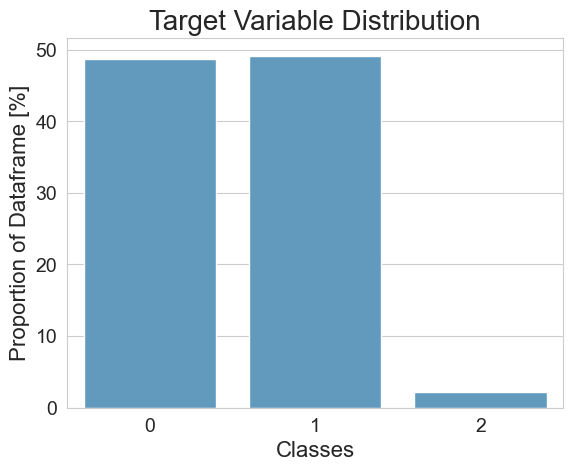

In [82]:
sns.barplot(x = value_count_percentage.index, y = value_count_percentage.values, color = my_blue)
plt.xlabel('Classes', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Proportion of Dataframe [%]', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Target Variable Distribution', fontsize = 20)
plt.show()

Perform train test split to aviod any data leakage:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
X_test = X_test.reset_index(drop = True)
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

### Endode our Categorical Columns

In [12]:
# define a dataframe containing our categorical data:
cat_df_train = X_train.select_dtypes(include = 'object')

# note we must reset the index of our test data to begin row index at zero to align with our encoded data
cat_df_test = X_test.select_dtypes(include = 'object')

In [13]:
cat_df_train.head()

,MONRACE,Gender,RaceorEthnicity,AppointingPresident1,PartyofAppointingPresident1,CIRCREGION,offence_category
0,White/Caucasian,Male,White,George W. Bush,Republican,northeast,Miscellaneous Crimes
1,White/Caucasian,Male,Hispanic,George W. Bush,Republican,west,Drug Crimes
2,Black/African American,Female,White,George W. Bush,Republican,west,Missing
3,White/Caucasian,Male,White,Ronald Reagan,Republican,midwest,Drug Crimes
4,White/Caucasian,Female,White,Barack Obama,Democratic,west,White-Collar Crimes


In [14]:
cat_df_test.head()

,MONRACE,Gender,RaceorEthnicity,AppointingPresident1,PartyofAppointingPresident1,CIRCREGION,offence_category
0,White/Caucasian,Male,White,Ronald Reagan,Republican,south,White-Collar Crimes
1,White/Caucasian,Male,White,George W. Bush,Republican,midwest,Property Crimes
2,White/Caucasian,Female,Asian American,Barack Obama,Democratic,west,Miscellaneous Crimes
3,White/Caucasian,Female,White,George W. Bush,Republican,west,Drug Crimes
4,Asian or Pacific Islander,Male,Asian American/Pacific Islander,Barack Obama,Democratic,west,Miscellaneous Crimes


In [15]:
# Instantiate
ohe_train = OneHotEncoder()
ohe_test = OneHotEncoder()

# fit and transform
encoded_train = ohe_train.fit_transform(cat_df_train)
encoded_test = ohe_test.fit_transform(cat_df_test)

# Convert from sparse matrix to dense
dense_array_train = encoded_train.toarray()
dense_array_test = encoded_test.toarray()

# Put into a dataframe to get column names
encoded_train_df = pd.DataFrame(dense_array_train, columns = ohe_train.get_feature_names_out(cat_df_train.columns), dtype='int16').reset_index(drop=True)
encoded_test_df = pd.DataFrame(dense_array_test, columns = ohe_test.get_feature_names_out(cat_df_test.columns), dtype='int16')

Note we are not dropping a col here, instead we use VIF to weed out multicollinearities in a smarter way. It also leaves all the variables in our base 'X_train' and 'X_test' for use in models where multicollinearity is not a concern.

In [16]:
encoded_train_df.head()

,MONRACE_American Indian\Alaskan Native,MONRACE_Asian or Pacific Islander,MONRACE_Black/African American,MONRACE_Missing,MONRACE_Multi-racial,MONRACE_Non-US American Indians,MONRACE_Other,MONRACE_White/Caucasian,Gender_Female,Gender_Male,...,CIRCREGION_northeast,CIRCREGION_south,CIRCREGION_west,offence_category_Drug Crimes,offence_category_Miscellaneous Crimes,offence_category_Missing,offence_category_Property Crimes,offence_category_Sexual Offenses,offence_category_Violent Crimes,offence_category_White-Collar Crimes
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
encoded_test_df.head()

,MONRACE_American Indian\Alaskan Native,MONRACE_Asian or Pacific Islander,MONRACE_Black/African American,MONRACE_Missing,MONRACE_Multi-racial,MONRACE_Non-US American Indians,MONRACE_Other,MONRACE_White/Caucasian,Gender_Female,Gender_Male,...,CIRCREGION_northeast,CIRCREGION_south,CIRCREGION_west,offence_category_Drug Crimes,offence_category_Miscellaneous Crimes,offence_category_Missing,offence_category_Property Crimes,offence_category_Sexual Offenses,offence_category_Violent Crimes,offence_category_White-Collar Crimes
0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [18]:
## redefine our independent variable sets using this new cenoded data combined with the numeric data
X_train = pd.concat([encoded_train_df, X_train.select_dtypes(include = 'number')], axis = 1).reset_index(drop = True)
X_test = pd.concat([encoded_test_df, X_test.select_dtypes(include = 'number')], axis = 1).reset_index(drop = True)

In [19]:
X_train.head()

,MONRACE_American Indian\Alaskan Native,MONRACE_Asian or Pacific Islander,MONRACE_Black/African American,MONRACE_Missing,MONRACE_Multi-racial,MONRACE_Non-US American Indians,MONRACE_Other,MONRACE_White/Caucasian,Gender_Female,Gender_Male,...,MONSEX,NEWCIT,NUMDEPEN,XFOLSOR,INT2,year,month,day_of_month,day_of_week,age_of_judge
0,0,0,0,0,0,0,0,1,0,1,...,0,1,1.0,6.0,0,2015,9,2,2,60.0
1,0,0,0,0,0,0,0,1,0,1,...,1,0,6.0,27.0,700,2014,4,8,1,59.0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0.0,13.0,300,2017,12,1,4,67.0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,2.0,25.0,700,2006,10,6,4,64.0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,4.0,19.0,560,2014,7,31,3,50.0


In [20]:
X_test.head()

,MONRACE_American Indian\Alaskan Native,MONRACE_Asian or Pacific Islander,MONRACE_Black/African American,MONRACE_Missing,MONRACE_Multi-racial,MONRACE_Non-US American Indians,MONRACE_Other,MONRACE_White/Caucasian,Gender_Female,Gender_Male,...,MONSEX,NEWCIT,NUMDEPEN,XFOLSOR,INT2,year,month,day_of_month,day_of_week,age_of_judge
0,0,0,0,0,0,0,0,1,0,1,...,0,1,3.0,10.0,590,2002,11,8,4,61.0
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0.0,10.0,0,2013,5,2,3,66.0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,5.0,12.0,700,2012,3,14,2,44.0
3,0,0,0,0,0,0,0,1,1,0,...,0,1,6.0,15.0,440,2004,5,6,3,51.0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,2.0,13.0,0,2013,11,5,1,47.0


### Apply Scaler

Elect to use a `StandardScaler()`, note we are leaving our target variable unscaled as it is binned into classes.

In [21]:
# instantiate
ss = StandardScaler()

# fit
ss = ss.fit(X_train)

# transform
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# convert to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

### Multicollinearity

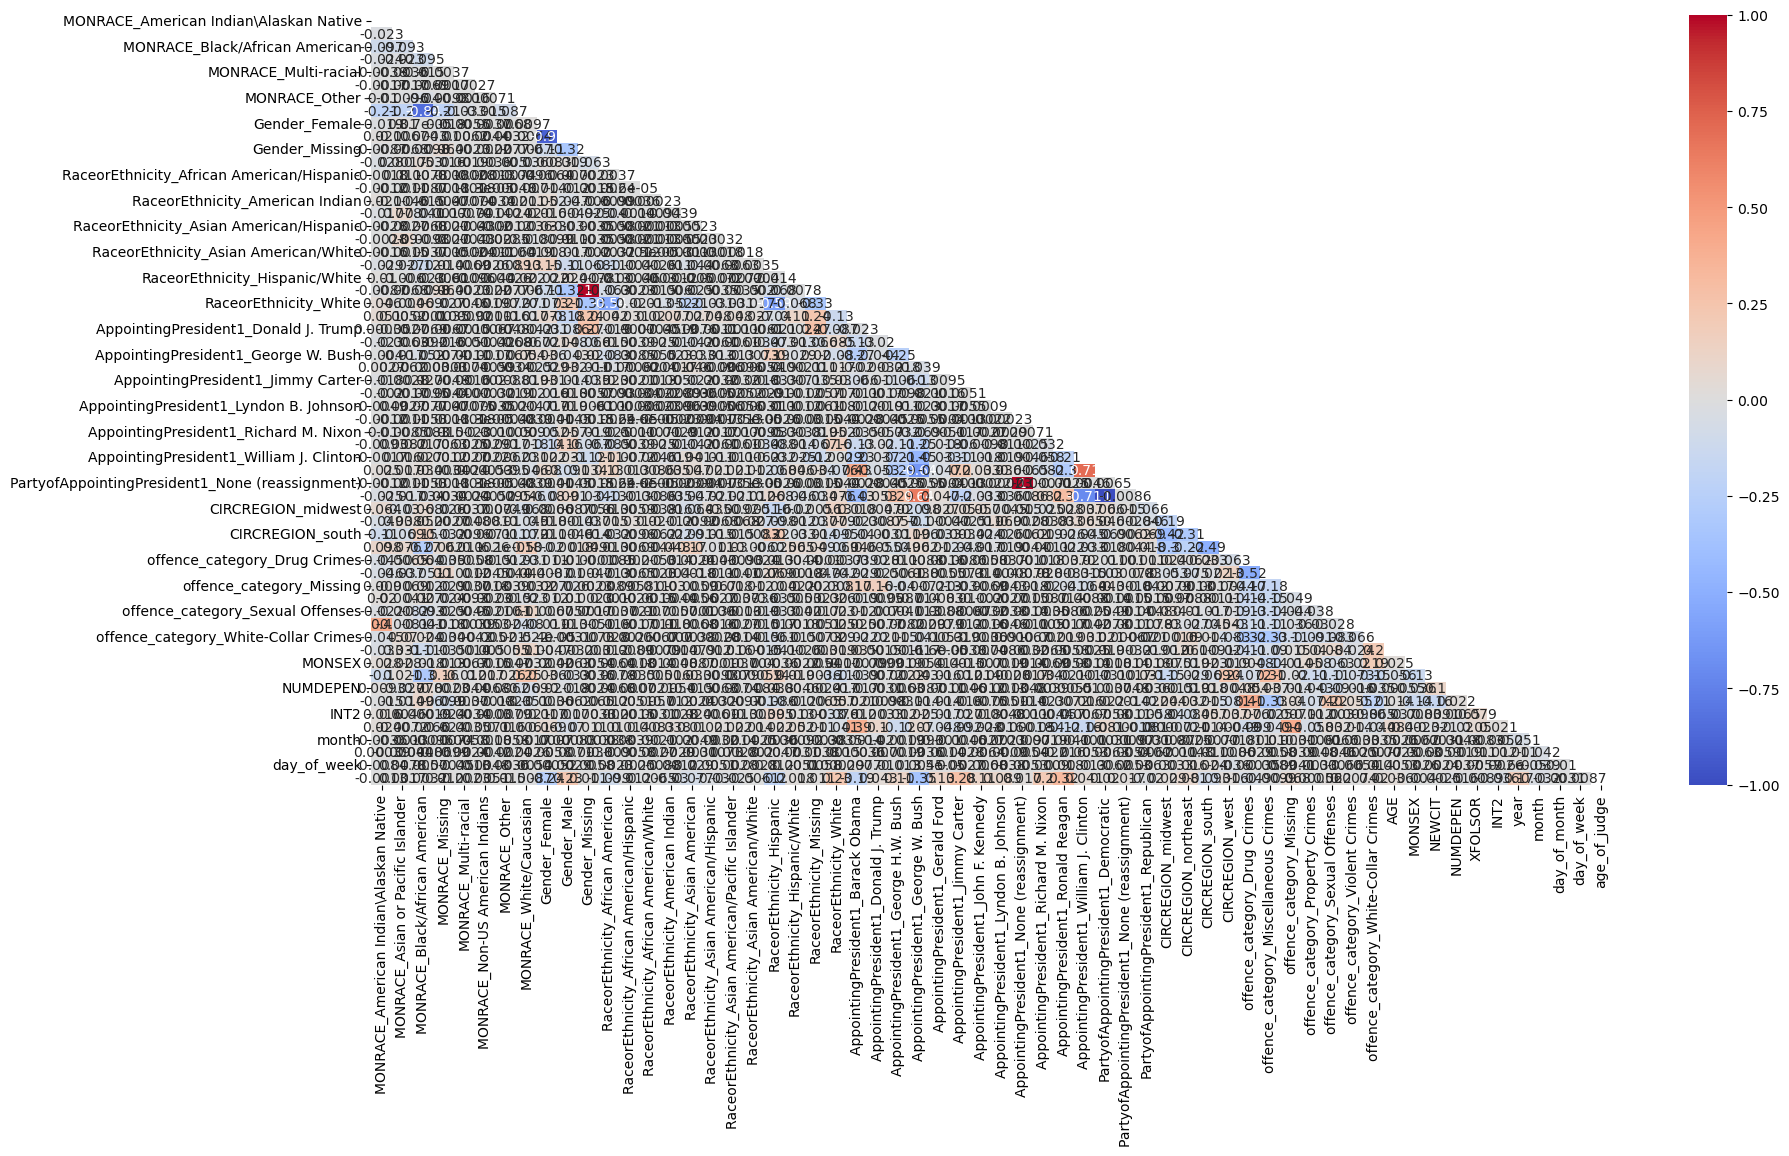

In [22]:
plt.figure(figsize=(20,10))
matrix = np.triu(X_train_scaled.corr())
sns.heatmap(X_train_scaled.corr(), cmap = 'coolwarm', mask = matrix, vmin = -1, vmax = 1, annot = True)
plt.show()

In [23]:
# copy variables over, note 'nomc' stands for no multicollinearity
X_train_scaled_nomc = X_train_scaled.copy()
X_test_scaled_nomc = X_test_scaled.copy()

In [24]:
## asumming same patterns that are present in train are also in test
VIF_test = pd.Series([variance_inflation_factor(sm.add_constant(X_train_scaled_nomc).values, i) 
               for i in range(sm.add_constant(X_train_scaled_nomc).shape[1])], 
               index=sm.add_constant(X_train_scaled_nomc).columns)[1:] # leaving out the constant

VIF_test.sort_values(ascending = False)

AppointingPresident1_None (reassignment)           8.173502e+10
PartyofAppointingPresident1_None (reassignment)    4.227065e+10
MONRACE_Non-US American Indians                    3.255222e+10
RaceorEthnicity_Asian American/White               2.346523e+10
MONRACE_Multi-racial                               1.688604e+10
RaceorEthnicity_Hispanic/White                     1.195978e+10
RaceorEthnicity_Asian American/Hispanic            3.383728e+09
offence_category_Violent Crimes                    2.389900e+09
MONRACE_Other                                      2.388920e+09
offence_category_Property Crimes                   1.999404e+09
RaceorEthnicity_American Indian                    1.740541e+09
AppointingPresident1_Lyndon B. Johnson             1.737942e+09
RaceorEthnicity_African American/White             1.080786e+09
RaceorEthnicity_Asian American/Pacific Islander    7.117662e+08
MONRACE_Asian or Pacific Islander                  4.828125e+08
RaceorEthnicity_Missing                 

In [25]:
while VIF_test.max() > 5:
    #drop variable with highest VIF score
    X_train_scaled_nomc.drop(VIF_test.sort_values(ascending = False).index[0], axis = 1, inplace = True)
    X_test_scaled_nomc.drop(VIF_test.sort_values(ascending = False).index[0], axis = 1, inplace = True)
    
    #rerun VIF test
    VIF_test = pd.Series([variance_inflation_factor(sm.add_constant(X_train_scaled_nomc).values, i) 
               for i in range(sm.add_constant(X_train_scaled_nomc).shape[1])], 
               index=sm.add_constant(X_train_scaled_nomc).columns)[1:]
    
VIF_test.sort_values(ascending = False)

C:\Users\Jason\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Jason\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Jason\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


age_of_judge                                       2.274068
year                                               1.942557
CIRCREGION_west                                    1.915021
CIRCREGION_south                                   1.889281
AppointingPresident1_Ronald Reagan                 1.707539
offence_category_Drug Crimes                       1.639627
AppointingPresident1_William J. Clinton            1.618109
AppointingPresident1_Barack Obama                  1.514497
AppointingPresident1_Jimmy Carter                  1.455249
XFOLSOR                                            1.445580
CIRCREGION_northeast                               1.445254
Gender_Missing                                     1.426747
AppointingPresident1_George H.W. Bush              1.422035
offence_category_White-Collar Crimes               1.420527
NEWCIT                                             1.372048
offence_category_Missing                           1.322190
MONRACE_Black/African American          

## Dealing with our imbalanced data

Lets look at the effectiveness of different techniques that deal with imbalanced data and see how they imporve our logreg model.

- no edits (denoted as 'base')
- upsamples
- SMOTE
- Weighted

### Upsample our Minority Class in Train Set

Upsample our class '2' to be the average number of samples in our class 0 and 1:
Note: doing this down here as it got rid of all my datatypes so was difficult to split object types for encoding.

In [32]:
# add this back in if you get an error
#y_train = y_train.reset_index(drop=True)

# note we can use this for all versions
n_samples = int((X_train[y_train == 0].shape[0] + X_train[y_train == 1].shape[0])/2)

# should put this into a for loop:

# Original Data
X_upsampled, y_upsampled = resample(X_train[y_train == 2],
                                    y_train[y_train == 2], 
                                    replace = True, 
                                    n_samples = n_samples, 
                                    random_state = 1)
# Scaled Data
X_scaled_upsampled, y_upsampled = resample(X_train_scaled[y_train == 2],
                                    y_train[y_train == 2], 
                                    replace = True, 
                                    n_samples = n_samples, 
                                    random_state = 1)

# Scaled and no multicollinearity Data
X_scaled_nomc_upsampled, y_upsampled = resample(X_train_scaled_nomc[y_train == 2],
                                    y_train[y_train == 2], 
                                    replace = True, 
                                    n_samples = n_samples, 
                                    random_state = 1)

# Combine upsample with original data
y_train_upsampled = np.hstack((y_train[y_train == 0], y_train[y_train == 1], y_upsampled))
X_train_upsampled = np.vstack((X_train[y_train == 0], X_train[y_train == 1], X_upsampled))
X_train_scaled_upsampled = np.vstack((X_train_scaled[y_train == 0], X_train_scaled[y_train == 1], X_scaled_upsampled))
X_train_scaled_nomc_upsampled = np.vstack((X_train_scaled_nomc[y_train == 0], X_train_scaled_nomc[y_train == 1], X_scaled_nomc_upsampled))

# Convert the X variable numpy array into a dataframe
# note only X_train is reformed into a df as X is required to be a dataframe for modeling,
# y by comparison should be an array as already outputted so no transformation required
# note we use X_train as col header for both upsampled and scaled upsampled but specify X_train_scaled_nomc
# for the nomc variable as we have removed columns from this df
X_train_upsampled = pd.DataFrame(X_train_upsampled, columns=X_train.columns)
X_train_scaled_upsampled = pd.DataFrame(X_train_scaled_upsampled, columns=X_train.columns)
X_train_scaled_nomc_upsampled = pd.DataFrame(X_train_scaled_nomc_upsampled, columns=X_train_scaled_nomc.columns)

Redefine our datatypes:

In [34]:
X_train_upsampled = X_train_upsampled.astype(X_train.dtypes)
X_train_scaled_upsampled = X_train_scaled_upsampled.astype(X_train.dtypes)
X_train_scaled_nomc_upsampled = X_train_scaled_nomc_upsampled.astype(X_train_scaled_nomc.dtypes)

In [35]:
X_train_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131329 entries, 0 to 131328
Data columns (total 60 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   MONRACE_American Indian\Alaskan Native           131329 non-null  int16  
 1   MONRACE_Asian or Pacific Islander                131329 non-null  int16  
 2   MONRACE_Black/African American                   131329 non-null  int16  
 3   MONRACE_Missing                                  131329 non-null  int16  
 4   MONRACE_Multi-racial                             131329 non-null  int16  
 5   MONRACE_Non-US American Indians                  131329 non-null  int16  
 6   MONRACE_Other                                    131329 non-null  int16  
 7   MONRACE_White/Caucasian                          131329 non-null  int16  
 8   Gender_Female                                    131329 non-null  int16  
 9   Gender_Male    

### SMOTE

In [36]:
print(f'Original dataset shape %s {Counter(y_train)}')

# Create SMOTE object
smote = SMOTE(random_state = 99)

# Resample the dataset using SMOTE
# is there a way to not recalc y_train_smote each time?
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
X_train_scaled_nomc_smote, y_train_smote = smote.fit_resample(X_train_scaled_nomc, y_train)


print(f'Resampled dataset shape %s {Counter(y_train_smote)}')

Original dataset shape %s Counter({1: 44043, 0: 43510, 2: 2006})
Resampled dataset shape %s Counter({1: 44043, 0: 44043, 2: 44043})


## Applying Balancing Methods to Modeling

### Basic Models

In [39]:
# Define a list of models to iterate over
# SVM model diverging, excluded from loop
# KNN to computationally expensive, excluded from loop
C_values = np.logspace(-8, 8, 17)
max_depths = np.arange(20, int(np.sqrt(X_train.shape[0])), 20)
n_neighbors = np.arange(20, int(np.sqrt(X_train.shape[0])), 40)
models = [
    ('Logistic Regression', LogisticRegression(), {'C': C_values}),
    #('Support Vector Machine', LinearSVC(), {'C': [0.1, 1.0, 10.0]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': n_neighbors}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': max_depths})
]

In [40]:
X_train_dict = {'Logistic Regression': [X_train_scaled_nomc, X_train_scaled_nomc_upsampled, X_train_scaled_nomc_smote],
               'Support Vector Machine': [X_train_scaled_nomc, X_train_scaled_nomc_upsampled, X_train_scaled_nomc_smote],
               'K-Nearest Neighbors': [X_train_scaled, X_train_scaled_upsampled, X_train_scaled_smote],
               'Decision Tree': [X_train, X_train_upsampled, X_train_smote]}

X_test_dict = {'Logistic Regression': X_test_scaled_nomc,
               'Support Vector Machine': X_test_scaled_nomc,
               'K-Nearest Neighbors': X_test_scaled,
               'Decision Tree': X_test}

y_train_list = [y_train, y_train_upsampled, y_train_smote]

In [43]:
train_metrics = {}
test_metrics = {}
methods = ['base', 'upsampled', 'smote']

#iterate through our 3 methods
for i, method in enumerate(methods):
    # create empty dictionary for method key
    train_metrics[method] = {}
    test_metrics[method] = {}
    
    # iterate through each model
    for model_name, model, hyperparams in models:
        print("Model: {}".format(model_name)) \
        # create empty dictionary for model_name key
        train_metrics[method][model_name] = {}
        test_metrics[method][model_name] = {}

        # iterate through hyperparameters
        for param_name, param_values in hyperparams.items():
            for param_value in param_values:

                # set hyperparameter value for the model
                setattr(model, param_name, param_value)
                
                # train the model using corresponding dfs (apply sample to KNN)
                model.fit(X_train_dict[model_name][i], y_train_list[i])

                # make predictions using corresponding dfs
                y_train_pred = model.predict(X_train_dict[model_name][i])
                y_test_pred = model.predict(X_test_dict[model_name])

                # calculate Classification Report, output as dictionaries
                train_report = classification_report(y_train_list[i], y_train_pred, output_dict = True)   
                test_report = classification_report(y_test, y_test_pred, output_dict = True)

                # store metrics as layers in dict
                train_metrics[method][model_name][param_value] = train_report
                test_metrics[method][model_name][param_value] = test_report

Model: Logistic Regression


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metr

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metr

Model: K-Nearest Neighbors


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Model: Decision Tree
Model: Logistic Regression


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metr

Model: K-Nearest Neighbors


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Model: Decision Tree
Model: Logistic Regression
Model: K-Nearest Neighbors


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Model: Decision Tree


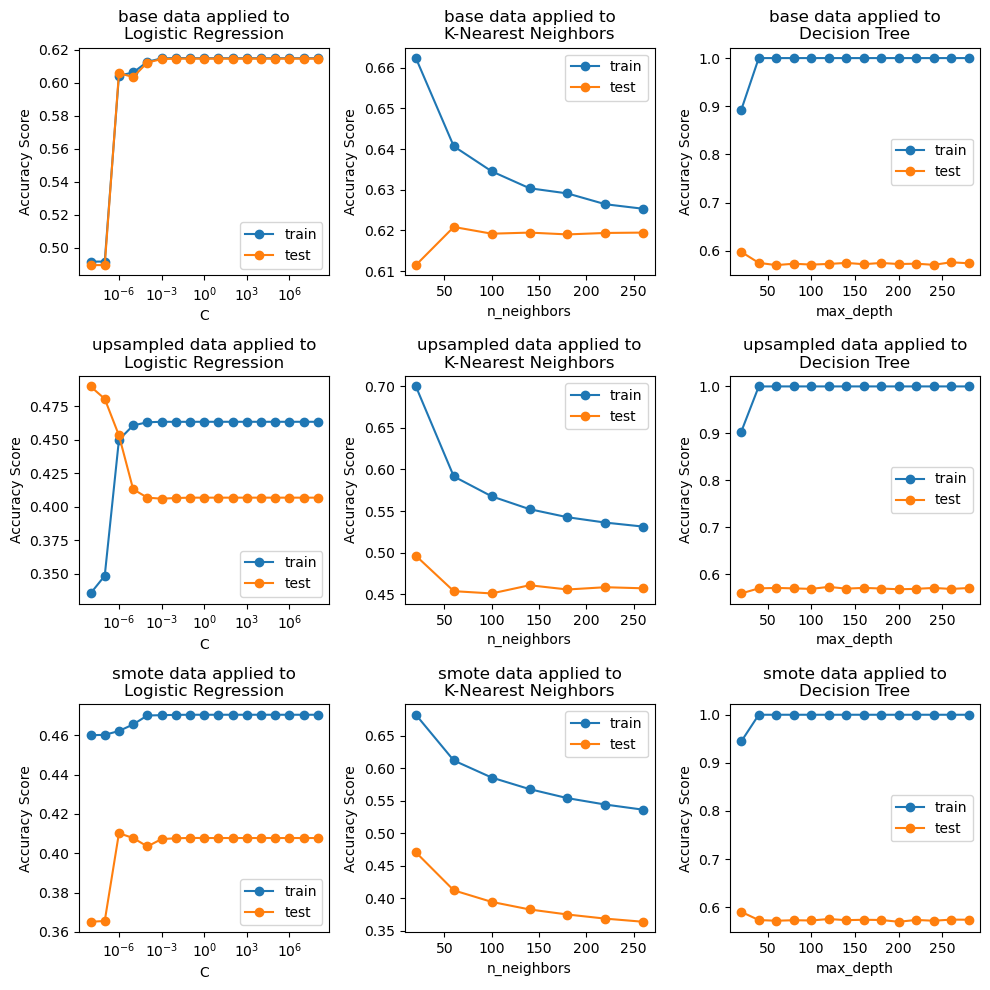

In [44]:
fig, ax = plt.subplots(ncols = len(models), nrows = len(methods), figsize = (10, 10))
for i, method in enumerate(methods):
    for j, (model_name, model, hyperparams) in enumerate(models):
        # could use either train or test for hyperparams
        hyperparam_values = train_metrics[method][model_name].keys()
        train_accuracies = []
        test_accuracies = []
        for hyperparam_value in hyperparam_values:
            train_accuracies.append(train_metrics[method][model_name][hyperparam_value]['accuracy'])
            test_accuracies.append(test_metrics[method][model_name][hyperparam_value]['accuracy'])
        ax[i, j].plot(hyperparam_values, train_accuracies, marker = 'o', label = 'train')
        ax[i, j].plot(hyperparam_values, test_accuracies, marker = 'o', label = 'test')
        if model_name == 'Logistic Regression':
            ax[i, j].set_xscale('log')
        ax[i, j].set_title(f'{method} data applied to\n{model_name}')
        #convert dict output to a list to get key value for axis label
        ax[i,j].set_xlabel(list(hyperparams.keys())[0])
        ax[i,j].set_ylabel('Accuracy Score')
        ax[i,j].legend()
plt.tight_layout()

In [45]:
chosen_params_dict = {'Logistic Regression': 1, # default C, in stable zone with some buffer
                      'K-Nearest Neighbors': n_neighbors[-1], # max seen in plots
                      'Decision Tree': 60} # max_depth in stable zone with some buffer

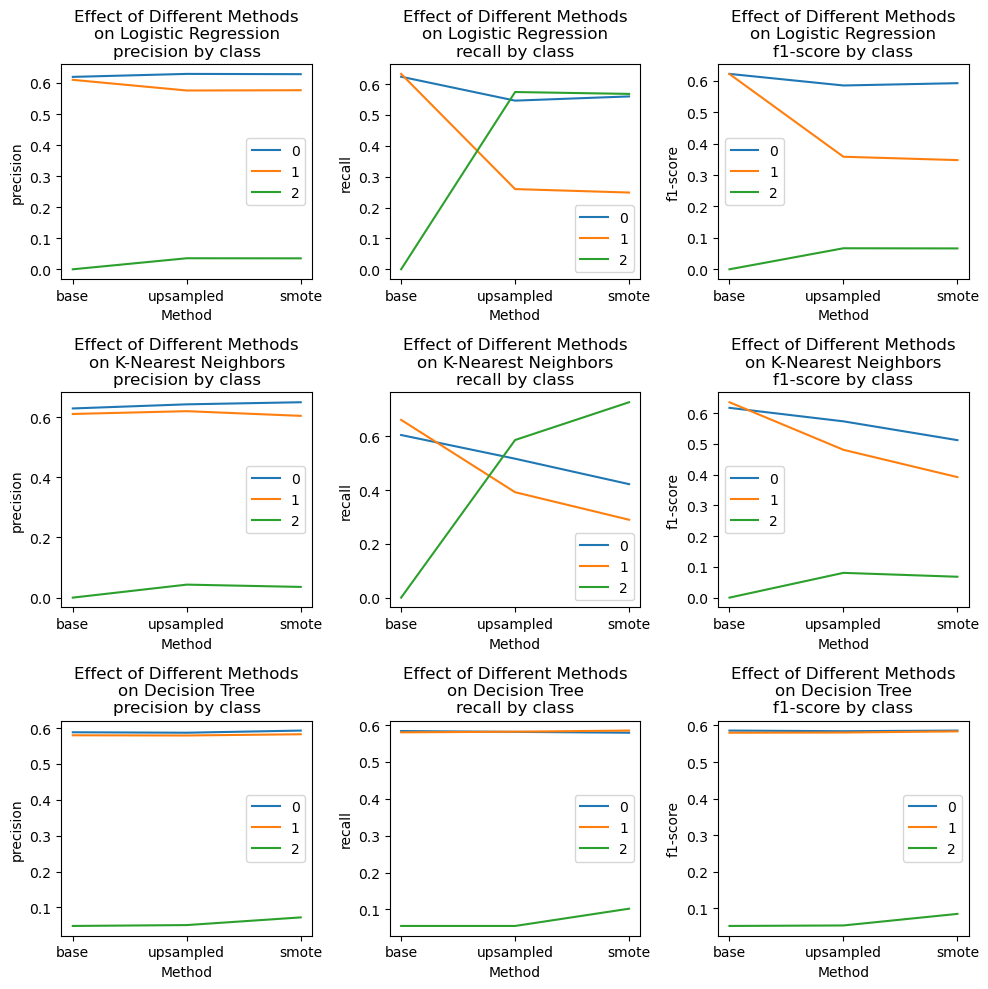

In [46]:
study_metrics = ['precision', 'recall', 'f1-score']
fig, ax = plt.subplots(ncols = len(study_metrics), nrows = len(models), figsize = (10, 10))

for j, study_metric in enumerate(study_metrics):
    for _class in y.unique():
        for i, (model_name, model, hyperparams) in enumerate(models):
            test_study = []
            for method in methods:
                test_study.append(test_metrics[method][model_name][chosen_params_dict[model_name]][str(_class)][study_metric])
            ax[i, j].plot(methods, test_study, label = _class)
            ax[i, j].set_ylabel(study_metric)
            ax[i, j].set_xlabel('Method')
            ax[i, j].set_title(f'Effect of Different Methods\non {model_name}\n{study_metric} by class')
            ax[i, j].legend()
plt.tight_layout()

The above subplots show that none of the methods had much of an impact on helping to resolve our minority class 2 with regards to precision (left hand plots). We did see some significant imporvement of our class 2 regarding the recall (middle plots), however this came at the cost of also negatively impacting both our class 0 and class 1. The f1 score (right hand plots) shows the combination of the recall and precision with no particularly positive results.

### Random Forest

Let's apply our most advanced method of resampling (SMOTE) to a random forest model and see how it performs:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     10936
           1       0.66      0.67      0.67     10963
           2       0.48      0.03      0.05       491

    accuracy                           0.66     22390
   macro avg       0.60      0.46      0.46     22390
weighted avg       0.66      0.66      0.66     22390



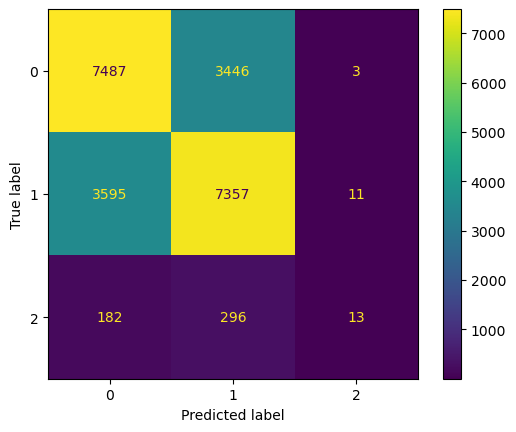

In [55]:
max_features = int(np.sqrt(X_train_smote.shape[1])) # number of features randomly chosen for each tree
max_depth = np.sqrt(X_train_smote.shape[0]) # less than this?
n_estimators = 100 # this is the default no of trees

# instantiate
RF = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth, random_state = 99)

# fit
RF.fit(X_train_smote, y_train_smote)

# train on traning set
y_pred_test = RF.predict(X_test)

print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)
plt.show()

Compared to our base models in section 5.1 this is an improvement. Although we still have a very low recall for class 2, the precision is much higher at 48% whilst maintaining very good results for classes 0 and 1.

### NN

Nest try a Neural Network, again using our most advanced resmapling method: SMOTE

In [57]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# define inputs an outputs
input_shape = (X_train_scaled_nomc_smote.shape[1], 1)
n_outputs = 3

# instantiate
model = Sequential()

# hidden layers
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(n_outputs, activation='softmax'))

# complie model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 2
epochs = 3
y_train_NN = to_categorical(y_train_smote, num_classes=n_outputs)
y_test_NN = to_categorical(y_test, num_classes=n_outputs)

# fit network
model.fit(X_train_scaled_nomc_smote, y_train_NN, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
66065/66065 [==============================] - 130s 2ms/step - loss: 1.0511 - accuracy: 0.4369
Epoch 2/3
66065/66065 [==============================] - 124s 2ms/step - loss: 1.0395 - accuracy: 0.4511
Epoch 3/3
66065/66065 [==============================] - 127s 2ms/step - loss: 1.0384 - accuracy: 0.4512


Epochs show not much improvement after only a few, no need to run more

In [62]:
# evaluate model, note 'result give us both ethe loss at index 0 and the score at index 1'
train_result = model.evaluate(X_train_scaled_nomc_smote, y_train_NN, batch_size=batch_size, verbose=1)
test_result = model.evaluate(X_test_scaled_nomc, y_test_NN, batch_size=batch_size, verbose=1)

print(f'train accuracy: {train_result[1]}')
print(f'test accuracy: {test_result[1]}')

11195/11195 [==============================] - 17s 2ms/step - loss: 1.0077 - accuracy: 0.4400
train accuracy: 0.49084606766700745
test accuracy: 0.43997320532798767


Over fitting slightly to our train data

              precision    recall  f1-score   support

           0       0.62      0.67      0.65     10936
           1       0.65      0.20      0.31     10963
           2       0.04      0.54      0.07       491

    accuracy                           0.44     22390
   macro avg       0.44      0.47      0.34     22390
weighted avg       0.62      0.44      0.47     22390



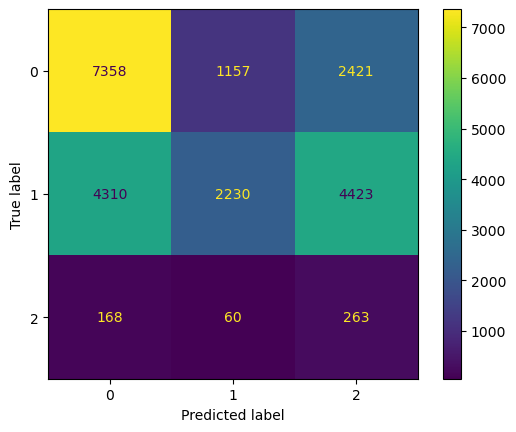

In [63]:
y_pred_test = model.predict(X_test_scaled_nomc, verbose = 0)

# convert predictions from one-hot encoding to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)
y_test = np.argmax(y_test_NN, axis=1)

print(classification_report(y_test, y_pred_test))

# display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()
plt.show()

This has performed very differently to our random forest with a high recall for our class 2 and low precision. However this has come at the cost of a much lower recall for class 1.

### XG Boost

Nest we'll try and XG Boost model, again using our SMOTE data. The hyperparameters here are less familiar to me and there are many so we will utilize a randomsearch to sift through the many possible combinations.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'subsample': 0.8, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.67      0.70      0.69     10936
           1       0.67      0.67      0.67     10963
           2       0.00      0.00      0.00       491

    accuracy                           0.67     22390
   macro avg       0.45      0.46      0.45     22390
weighted avg       0.66      0.67      0.66     22390



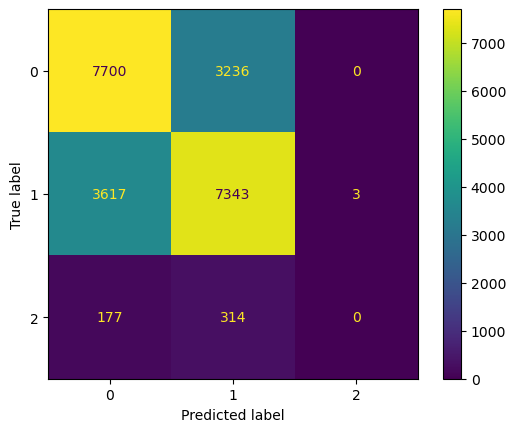

In [54]:
# Define parameters
params = {
    "objective": "multi:softmax",
    "num_class": 3,
}

# Define hyperparameter ranges
param_distributions = {
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "gamma": [0, 1, 5, 10],
}

# Train model with randomized search
model = xgb.XGBClassifier(**params)
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train_smote, y_train_smote)

# Print best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Predict on test set with best hyperparameters
y_pred = random_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Unable to resolve our class 2 at all with 0 percent across the board but very good performance for classes 1 and 2

### Random Forest with Weighted Classes

Let's take our most successful model and apply weighted classes to see if that will improve our results:

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     10936
           1       0.67      0.67      0.67     10963
           2       0.50      0.01      0.01       491

    accuracy                           0.67     22390
   macro avg       0.61      0.46      0.45     22390
weighted avg       0.66      0.67      0.66     22390



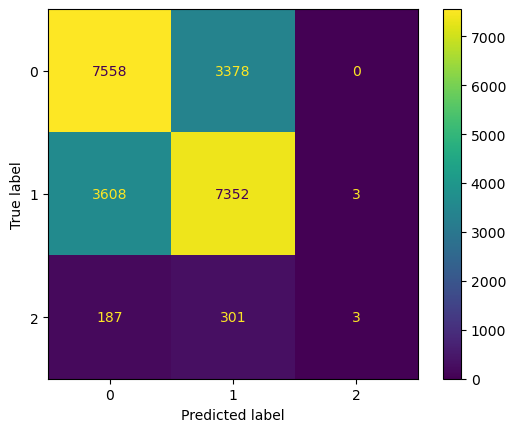

In [64]:
max_features = int(np.sqrt(X_train.shape[1])) # number of features randomly chosen for each tree
max_depth = np.sqrt(X_train.shape[0]) # less than this?
n_estimators = 100 # this is the default no of trees

# instantiate
RF = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth, class_weight='balanced', random_state = 99)

# fit
RF.fit(X_train, y_train)

# train on traning set
y_pred_test = RF.predict(X_test)

print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)
plt.show()

This result is very similar to our previous iteration of Random Forest Regressor with a decent precision but very poor recall for class 2.

## Conclusion

It seems we were partially able to resolve some of the patterns in our minority class 2 through our more advanced methods, however these efforts in the end were not successful. This prompts us to drop class 2 for our next notebook at treat it as a binary class problem.

Note that instead of taking a 20% sample from the eniter dataframe in section 2, we could have only dropped rows from class 0 and 1 to essentially down sample out majority classes. However the purpose of this exploratory study was to assess different data balancing techniques as data imbalance is common in industry and becoming familair with the tools needed to deal with it is very useful. In light of this the aim was not strictly to achieve good results but more to explore and understand different methods and ther effects on different models.